<a href="https://colab.research.google.com/github/001hazel/Math-152/blob/main/Muon_Physics_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Muon Lifetime Data Analysis

In the experiment we measured detected lifetimes of muons moving through a scintillator. These measured lifetimes are to be binned into data and fitted to a model of the from:

$ y(t_{j}) = Ae^{-t_{j}/τ} + B$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from google.colab import files
uploaded = files.upload()

Saving trial 1.csv to trial 1.csv


In [6]:
data = np.loadtxt('trial 1.csv')

In [7]:
print(data)

[ 580. 7940. 2240. ...  980.  160. 4600.]


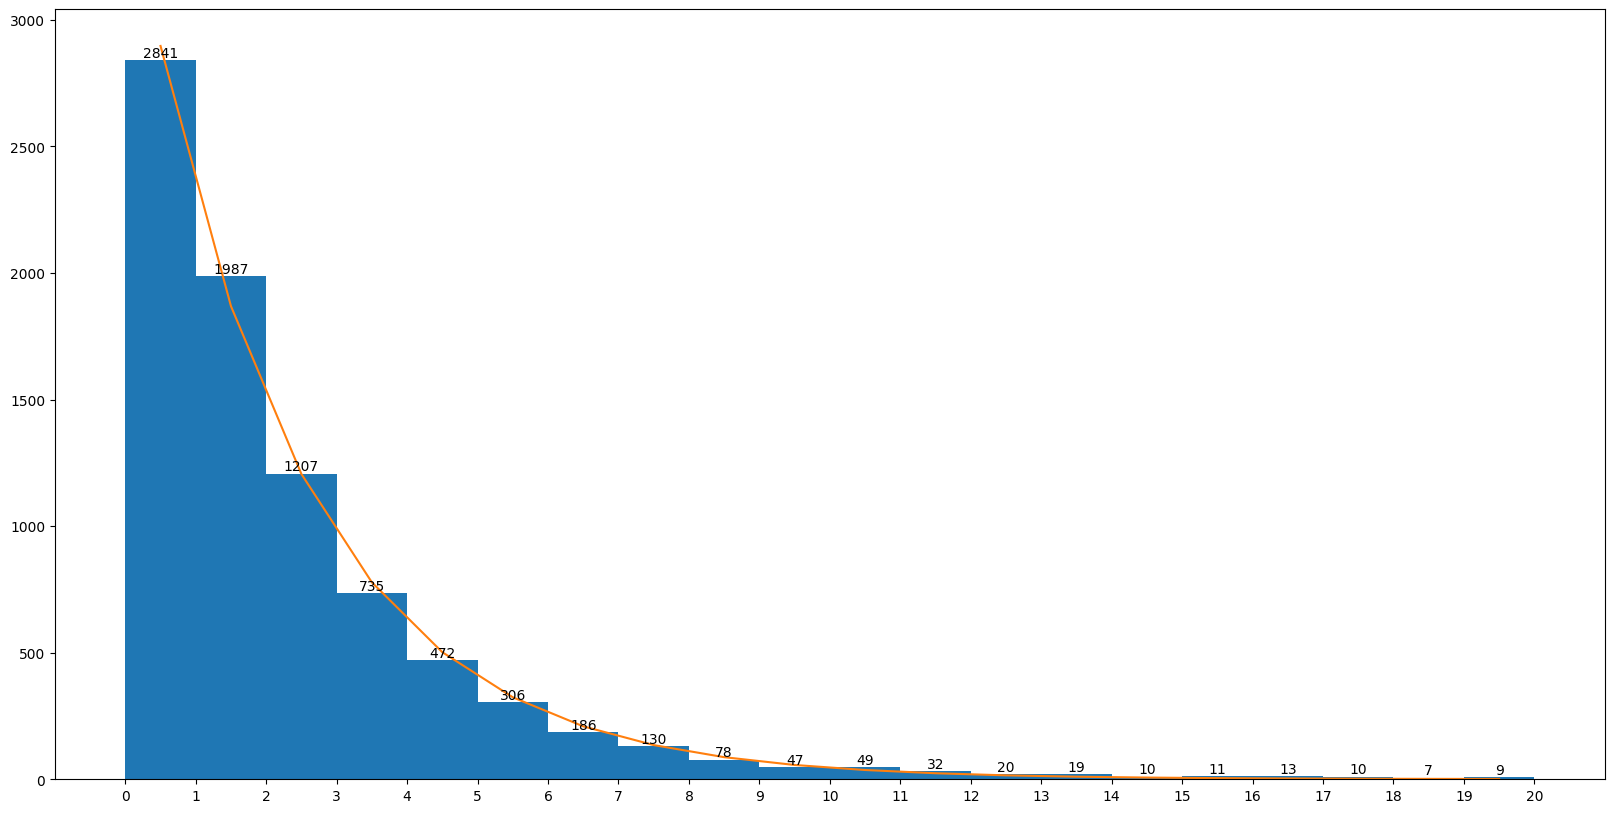

In [72]:
plt.figure(1,figsize=(20,10))
#plt.hist(data/1000,bins=20,range=(0,20))
plt.xticks(np.linspace(0,20,21))
bins,edges,bars = plt.hist(data/1000,bins=20,range=(0,20))
plt.bar_label(bars)
modelline = model(bincenters,*param)
plt.plot(bincenters,modelline)
plt.show(1)

In [17]:
print(bins)

[2841. 1987. 1207.  735.  472.  306.  186.  130.   78.   47.   49.   32.
   20.   19.   10.   11.   13.   10.    7.    9.]


In [18]:
print(edges)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20.]


In [61]:
bincenters = (edges[1:]+edges[:-1])/2
print(bincenters)

[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5 16.5 17.5 18.5 19.5]


Here we are testing the method outlined in the lab manual to obtain a value for $χ^2$

In [62]:
## This function will be used to compute A, B, and X**2 for a range of set tau values, and return the minimum value of X**2

def get_chi2(tau_initial,tau_final,width):
  N = len(edges)-1
  alpha = np.sum(bins)
  beta = 0
  gamma = np.sum(1/bins)
  delta = 0
  lam = 0
  A = 0
  B = 0
  chi = 10000
  stepsize = (tau_final-tau_initial)/width
  tau = tau_initial
  for i in range(width):
    beta_array = np.exp(-1*bincenters/tau)
    beta = np.sum(beta_array)
    #print(beta_array,beta)
    delta_array = beta_array/bins
    delta = np.sum(delta_array)
    lam_array = np.exp(-2*bincenters/tau)/bincenters
    lam = np.sum(lam_array)
    test_A = (beta*gamma-N*delta)/(lam*gamma-delta**2)
    test_B = (N*lam-beta*delta)/(lam*gamma-delta**2)
    test_chi = lam*test_A**2 + 2*delta*test_A*test_B + gamma*test_B**2 - 2*beta*test_A - 2*N*test_B + alpha
    #print(test_A,test_B,test_chi)
    if test_chi < chi:
      chi = test_chi
      A = test_A
      B = test_B
      tau_final = tau
    tau = tau + stepsize
  print("A = {0}, B = {1}, Chi squared = {2}, Tau = {3}".format(A,B,chi,tau_final))
  return (A,B,chi,tau_final)


In [63]:
get_chi2(0.1,10,1000)

A = 1.5942499441440467, B = 23.861350519781038, Chi squared = 7681.4111117651355, Tau = 6.881500000000012


(1.5942499441440467, 23.861350519781038, 7681.4111117651355, 6.881500000000012)

We will compare this to python implemented fitting methods.

In [64]:
import scipy.special as sp
import scipy.optimize
import scipy.stats as stat

In [65]:
def model(x,A,B,Tau):
  return A*np.exp(-1*x/Tau)+B

In [66]:
param,covar = scipy.optimize.curve_fit(model,bincenters,bins)

In [71]:
#copy and pasted to plot above
modelline = model(bincenters,*param)
plt.plot(bincenters,modelline)
plt.show(1)